# Tokenization adn Normalization

In [125]:
import json
import os
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [126]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [127]:
# Load the data
# Load the data from the JSON file
data_path = './data/reddit_jokes.json'
with open(data_path) as f:
    data = json.load(f)

In [128]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      id  score  \
0  Now I have to say "Leroy can you please paint ...  5tz52q      1   
1  Pizza doesn't scream when you put it in the ov...  5tz4dd      0   
2  ...and being there really helped me learn abou...  5tz319      0   
3  A Sunday school teacher is concerned that his ...  5tz2wj      1   
4  He got caught trying to sell the two books to ...  5tz1pc      0   

                                               title  
0   I hate how you cant even say black paint anymore  
1  What's the difference between a Jew in Nazi Ge...  
2                     I recently went to America....  
3  Brian raises his hand and says, “He’s in Heaven.”  
4  You hear about the University book store worke...

In [129]:
# NOTE: bit more than 1000 jokes for removing duplicates and empty jokes
num_good = 1033
num_bad = 1019
min_score = 50


df_sroted = df.sort_values(by='score', ascending=False)
df_sroted = df_sroted.reset_index(drop=True)

df_good = df_sroted.head(num_good)
df_good = df_good.reset_index(drop=True)

df_bad = df_sroted[df_sroted['score'] > min_score].tail(num_bad)
df_bad = df_bad.reset_index(drop=True)

In [130]:
# avg score and shape
print('avg score good jokes:', df_good['score'].mean().round(2), 'shape:', df_good.shape)
print('avg score bad jokes:', df_bad['score'].mean().round(2), 'shape:', df_bad.shape)

avg score good jokes: 10802.19 shape: (1033, 4)
avg score bad jokes: 52.3 shape: (1019, 4)


In [131]:
# print random 5 good jokes
print('#' * 100)
print('5 random good jokes:')
print('#' * 100)
for i in range(5):
    print(df_good['title'][np.random.randint(0, num_good)])
    print(df_good['body'][np.random.randint(0, num_good)])
    print('-' * 100)

####################################################################################################
5 random good jokes:
####################################################################################################
George R R Martin, dead after reaching peak popularity
[Removed]
----------------------------------------------------------------------------------------------------
Royal Wedding
My dad was holding me from behind .
----------------------------------------------------------------------------------------------------
I want to be a millionaire just like my dad!!
...The King of England and The King of Spain are having an argument over who has the biggest penis. Eventually they decide to let the people judge.
They all stand on a stage in front of the people and drop their pants one by one.

The king of France drops his and the French crowd shout "viva la france!!"

The king of Spain drops his and the Spanish crowd shout "Viva la españa!!"

The king of England drops his, 

In [132]:
# print random 5 bad jokes
print('#' * 100)
print('5 random bad jokes:')
print('#' * 100)
for i in range(5):
    print(df_bad['title'][np.random.randint(0, num_bad)])
    print(df_bad['body'][np.random.randint(0, num_bad)])
    print('-' * 100)

####################################################################################################
5 random bad jokes:
####################################################################################################
Saying Goodbye to Mother
There was a farmer who had a brown cow and a white cow and he wanted to get them bred, so borrowed his neighbor's bull and turned it loose in the pasture. He told his son to watch and come in and tell him when the bull was finished.

After a while the boy came into the living where his father was talking with some friends. "Say, Pop," said the boy. "Yes," replied his father.

"The bull just fucked the brown cow."

There was a sudden lull in the conversation. The father said "Excuse me" and took his son outside. "Son, you mustn't use language like that in front of company. You should say 'The bull surprised the brown cow'. Now go and watch and tell me when the bull surprises the white cow."

The father went back inside the house. After a while 

In [133]:
bool_lemma = True

# tokenize the jokes
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize_joke(joke):
    tokens = word_tokenize(joke)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    if bool_lemma:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Tokenize and lemmatize the jokes
df_good['tok_body'] = df_good['body'].apply(tokenize_and_lemmatize_joke)
df_bad['tok_body'] = df_bad['body'].apply(tokenize_and_lemmatize_joke)

df_good['tok_title'] = df_good['title'].apply(tokenize_and_lemmatize_joke)
df_bad['tok_title'] = df_bad['title'].apply(tokenize_and_lemmatize_joke)

df_good['tokens'] = df_good['tok_body'] + df_good['tok_title']
df_bad['tokens'] = df_bad['tok_body'] + df_bad['tok_title']


print('shape after tokenizing:', df_good.shape, df_bad.shape)
# remove empty jokes
df_good = df_good[df_good['tokens'].map(len) > 0]
df_bad = df_bad[df_bad['tokens'].map(len) > 0]
print('shape after removing empty jokes:', df_good.shape, df_bad.shape)

# remove duplicates
df_good = df_good.drop_duplicates(subset='body')
df_bad = df_bad.drop_duplicates(subset='body')
print('shape after removing duplicates:', df_good.shape, df_bad.shape)

shape after tokenizing: (1033, 7) (1019, 7)
shape after removing empty jokes: (1033, 7) (1019, 7)
shape after removing duplicates: (1002, 7) (1000, 7)


In [134]:
# count the words
good_words = Counter()
for tokens in df_good['tokens']:
    good_words.update(tokens)

bad_words = Counter()
for tokens in df_bad['tokens']:
    bad_words.update(tokens)

print('good words:', good_words)
print('bad words:', bad_words)

# if words in both good and bad jokes
common_words = good_words.keys() & bad_words.keys()
# plot counter of common words for good and bad jokes
common_words_good = {word: good_words[word] for word in common_words}
common_words_bad = {word: bad_words[word] for word in common_words}
# realtive how often word is used in good and bad jokes
common_words_good_rel = {word: good_words[word] / (good_words[word] + bad_words[word]) for word in common_words}
common_words_bad_rel = {word: bad_words[word] / (good_words[word] + bad_words[word]) for word in common_words}
# avg relative frequency difference between good and bad jokes
avg_rel_diff = np.mean([common_words_good_rel[word] - common_words_bad_rel[word] for word in common_words])
print('avg relative frequency difference:', avg_rel_diff)

good words: Counter({'say': 523, 'man': 401, 'said': 393, 'one': 309, 'get': 252, 'go': 238, 'woman': 203, 'wife': 188, 'guy': 187, 'like': 169, 'asked': 164, 'back': 164, 'know': 163, 'would': 162, 'asks': 162, 'day': 160, 'time': 153, 'girl': 147, 'husband': 142, 'well': 141, 'two': 138, 'edit': 138, 'want': 137, 'see': 134, 'old': 129, 'think': 127, 'joke': 126, 'take': 125, 'could': 124, 'look': 122, 'first': 119, 'year': 118, 'give': 116, 'told': 112, 'got': 110, 'come': 109, 'people': 108, 'little': 105, 'went': 104, 'boy': 104, 'going': 99, 'next': 98, 'tell': 98, 'father': 98, 'sex': 97, 'walk': 96, 'good': 93, 'bar': 93, 'son': 92, 'make': 90, 'friend': 84, 'replied': 82, 'dad': 82, 'hand': 81, 'find': 80, 'reply': 79, 'ca': 78, 'way': 78, 'never': 76, 'really': 75, 'minute': 75, 'home': 71, 'right': 71, 'around': 71, 'doctor': 69, 'car': 68, 'put': 67, 'still': 66, 'night': 66, 'later': 66, 'blonde': 65, 'black': 65, 'priest': 64, 'god': 63, 'much': 63, 'new': 63, 'house': 63

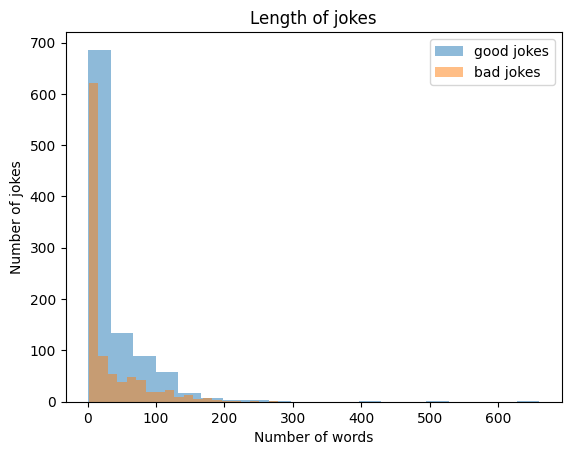

In [135]:
# count length of jokes
df_good['length'] = df_good['tokens'].apply(len)
df_bad['length'] = df_bad['tokens'].apply(len)

# plot the length of jokes
plt.hist(df_good['length'], bins=20, alpha=0.5, label='good jokes')
plt.hist(df_bad['length'], bins=20, alpha=0.5, label='bad jokes')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Number of jokes')
plt.title('Length of jokes')
plt.show()

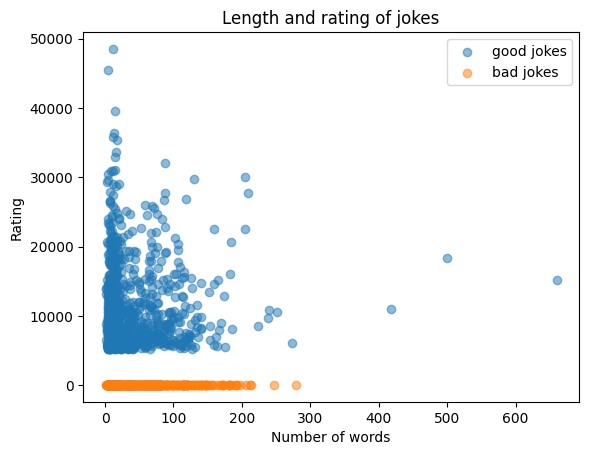

In [136]:
# plot length and rating of jokes
plt.scatter(df_good['length'], df_good['score'], alpha=0.5, label='good jokes')
plt.scatter(df_bad['length'], df_bad['score'], alpha=0.5, label='bad jokes')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Rating')
plt.title('Length and rating of jokes')
plt.show()

In [137]:
# print random 5 good jokes
print('#' * 100)
print('5 random good jokes:')
print('#' * 100)
for i in range(5):
    print(df_good['tokens'][np.random.randint(0, num_good - 100)])
    print('-' * 100)


####################################################################################################
5 random good jokes:
####################################################################################################
['one', 'buy', 'going', 'kill', 'writing', 'book', 'called', 'overreacting']
----------------------------------------------------------------------------------------------------
['christian', 'priest', 'came', 'laid', 'hand', 'hand', 'said', 'jesus', 'christ', 'walk', 'today', 'smiled', 'told', 'paralysed', 'rabbi', 'came', 'laid', 'hand', 'hand', 'said', 'god', 'almighty', 'walk', 'today', 'le', 'amused', 'told', 'nothing', 'wrong', 'mullah', 'came', 'took', 'hand', 'said', 'insha', 'allah', 'walk', 'today', 'snapped', 'nothing', 'wrong', 'buddhist', 'monk', 'came', 'held', 'hand', 'said', 'great', 'buddha', 'walk', 'today', 'rudely', 'told', 'nothing', 'wrong', 'sermon', 'stepped', 'outside', 'found', 'car', 'stolen', 'edit', 'thanks', 'upvotes', 'inadvertently', '

In [ ]:
# save the data
#df_good.to_csv('./data/tok_good_jokes.csv', index=False)
#df_bad.to_csv('./data/tok_bad_jokes.csv', index=False)